### Step 5: Modeling
The goal of the modeling step is to develop a final model that effectively predicts the
stated goal in the problem identification section. Review the types of models that would
be appropriate given your modeling response variable and the features in your dataset
and build two to three models. In addition to considering different algorithm types in
your model selection, also consider applying model hyperparameter tuning operations.
Be sure to define the metrics you use to choose your final model.
If you need a refresher about how to go about building a model, review the work you did
during the guided capstone and the unit about modeling.


Goal: Build two to three different models and identify the best one.

● Fit your models with a training dataset

● Review model outcomes — Iterate over additional models as needed

Identify the final model that you think is the best model for this project
Review the following questions and apply them to your analysis:
    ● Does my data involve a time series or forecasting? If so, am I split
ting the train
and test data appropriately?
    ● Is my response variable continuous or categorical? 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

#warnings.filterwarnings('error', category=DeprecationWarning)

In [18]:
#load split training and test data
X_trainv = pd.read_csv('X_vtrain.csv', index_col = False)
X_trainb = pd.read_csv('X_tbtrain.csv', index_col = False)
y_trainv = pd.read_csv('y_vtrain.csv', index_col = False)
y_trainb = pd.read_csv('y_tbtrain.csv', index_col = False)

X_testv = pd.read_csv('X_vtest.csv',  index_col = False)
X_testb = pd.read_csv('X_tbtest.csv',  index_col = False)
y_testv = pd.read_csv('y_vtest.csv', index_col = False)
y_testb = pd.read_csv('y_tbtest.csv', index_col = False)

In [19]:
X_trainb.head()

,Text_Combined
0,winter sports day local park wintersports fun
1,dismissive gestures curtain drawn shield vulne...
2,feeling inspired attending workshop inspiratio...
3,fearful whispers dark mind haunted specter unk...
4,lost enchantment disneyland ride journey realm...


In [20]:
y_trainb.head()

,Sentiment_TextBlob
0,Positive
1,Neutral
2,Neutral
3,Negative
4,Neutral


In [21]:
y_trainv.head()

,Sentiment_VADER
0,Positive
1,Positive
2,Positive
3,Negative
4,Positive


In [22]:
def print_evaluation_metrics(y_true, y_pred, model_name):
    """
    Prints the evaluation metrics for the given predictions.
    
    Args:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    model_name (str): Name of the model to print for clarity.
    
    """
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    cm = confusion_matrix(y_true, y_pred)
    _, ax = plt.subplots()
    display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels =  ['negative', 'neutral', 'positive'])
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_xticklabels(labels = ['negative', 'neutral', 'positive'], fontsize = 8)
    ax.set_yticklabels(labels = ['negative', 'neutral', 'positive'], fontsize = 8)
    ax.set_title(model_name)
    display_cm.plot(ax = ax)

    print(f"{model_name} Metrics")
    print("Accuracy: {:.4f}".format(accuracy))
    print("F1 Score: {:.4f}".format(f1))
    print("\n")  # Adding a new lineS between model output

### Logistic Regression

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters for Vader Data: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
LR - VADER Data Metrics
Accuracy: 0.8435
F1 Score: 0.8307


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters for TextBlob Data: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
LR - TextBlob Data Metrics
Accuracy: 0.7397
F1 Score: 0.7281




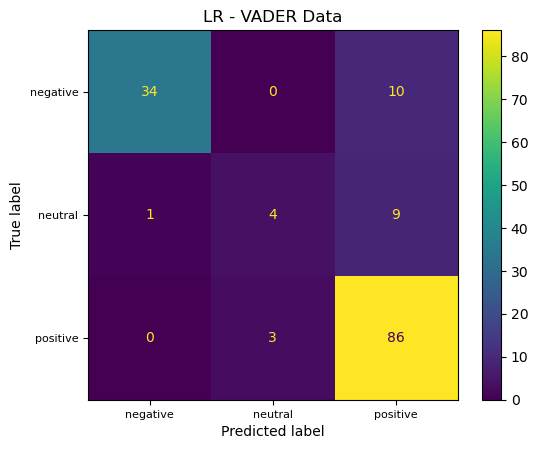

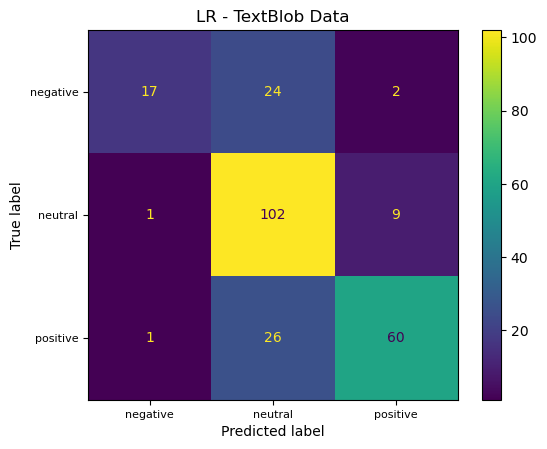

In [23]:
# Define the pipeline for logistic regression
pipeline = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=25000, random_state=123))

# Parameters of the logistic regression to tune
parameters = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l1', 'l2'],  # Type of regularization
    'logisticregression__solver': ['liblinear']  # Solver compatible with l1 penalty
}

# Create the grid search 
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', verbose=1)


# Fit the grid search to the data for Vader
grid_search.fit(X_trainv['Text_Combined'], y_trainv['Sentiment_VADER'])
best_model_v = grid_search.best_estimator_

# Predict using the best model
y_pred_v = best_model_v.predict(X_testv['Text_Combined'])

# Evaluation metrics
print("Best Parameters for Vader Data:", grid_search.best_params_)
print_evaluation_metrics(y_testv['Sentiment_VADER'], y_pred_v, "LR - VADER Data")


# Fit the grid search to the data for TextBlob
grid_search.fit(X_trainb['Text_Combined'], y_trainb['Sentiment_TextBlob'])
best_model_b = grid_search.best_estimator_

# Predict using the best model
y_pred_b = best_model_b.predict(X_testb['Text_Combined'])

# Evaluation metrics
print("Best Parameters for TextBlob Data:", grid_search.best_params_)
print_evaluation_metrics(y_testb['Sentiment_TextBlob'], y_pred_b, "LR - TextBlob Data")

### Support Vector Machines

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svm', SVC(C=1, kernel='linear', random_state=123))])
SVM - Vader Data Metrics
Accuracy: 0.8435
F1 Score: 0.8326


Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svm', SVC(C=1, kernel='linear', random_state=123))])
SVM - TextBlob Data Metrics
Accuracy: 0.6570
F1 Score: 0.6453




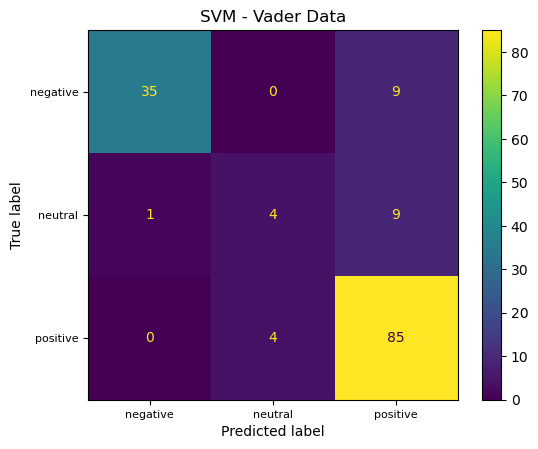

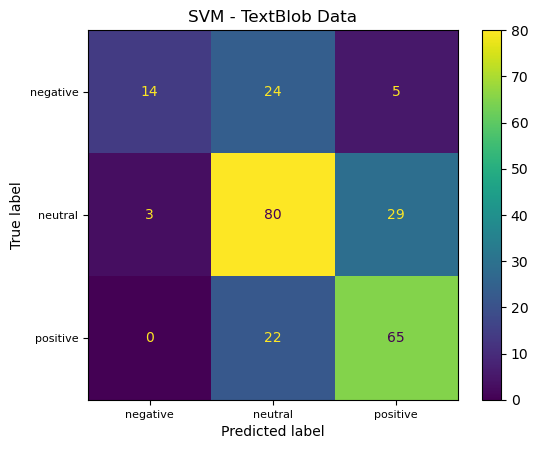

In [28]:
# Define the pipeline for SVM
pipeline_svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svm', SVC(kernel='linear', random_state=123))
])

# Parameters to tune for SVM
parameters_svm = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf']  # Types of kernels
}

# Grid search for hyperparameter tuning
grid_search_svm = GridSearchCV(pipeline_svm, parameters_svm, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data for Vader
grid_search_svm.fit(X_trainv['Text_Combined'], y_trainv['Sentiment_VADER'])
best_model_svm_v = grid_search_svm.best_estimator_
print('best params:', best_model_svm_v)
y_pred_svm_v = best_model_svm_v.predict(X_testv['Text_Combined'])
print_evaluation_metrics(y_testv['Sentiment_VADER'], y_pred_svm_v, "SVM - Vader Data")

# Repeat for TextBlob data
grid_search_svm.fit(X_trainb['Text_Combined'], y_trainb['Sentiment_TextBlob'])
best_model_svm_b = grid_search_svm.best_estimator_
print('best params:', best_model_svm_b)
y_pred_svm_b = best_model_svm_b.predict(X_testb['Text_Combined'])
print_evaluation_metrics(y_testb['Sentiment_TextBlob'], y_pred_svm_b, "SVM - TextBlob Data")

### Random Forest

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(n_estimators=200, random_state=123))])
Random Forest - Vader Data Metrics
Accuracy: 0.7483
F1 Score: 0.7056


Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier(random_state=123))])
Random Forest - TextBlob Data Metrics
Accuracy: 0.6901
F1 Score: 0.6592




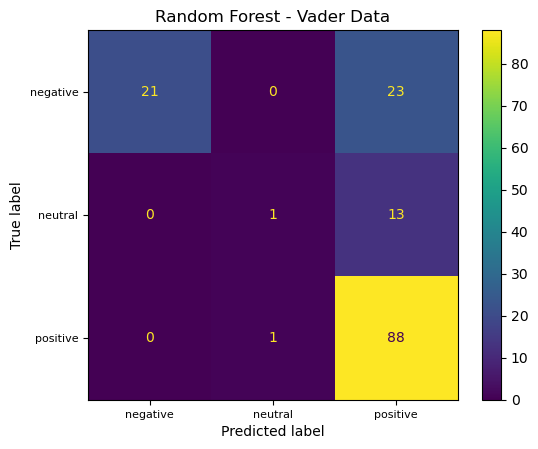

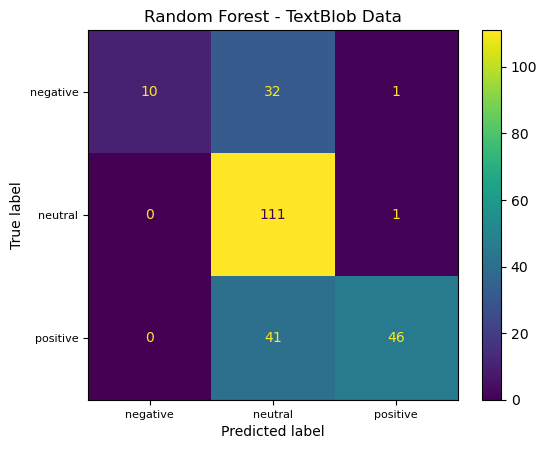

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline for Random Forest
pipeline_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state=123))
])

# Parameters to tune for Random Forest
parameters_rf = {
    'rf__n_estimators': [100, 200],  # Number of trees
    'rf__max_depth': [10, 20, None]  # Depth of each tree
}

# Grid search for hyperparameter tuning
grid_search_rf = GridSearchCV(pipeline_rf, parameters_rf, cv=5, scoring='accuracy', verbose=1)

# Fit and evaluate for both Vader and TextBlob data
grid_search_rf.fit(X_trainv['Text_Combined'], y_trainv['Sentiment_VADER'])
best_model_rf_v = grid_search_rf.best_estimator_
print('best params:', best_model_rf_v)
y_pred_rf_v = best_model_rf_v.predict(X_testv['Text_Combined'])
print_evaluation_metrics(y_testv['Sentiment_VADER'], y_pred_rf_v, "Random Forest - Vader Data")

grid_search_rf.fit(X_trainb['Text_Combined'], y_trainb['Sentiment_TextBlob'])
best_model_rf_b = grid_search_rf.best_estimator_
print('best params:', best_model_rf_b)
y_pred_rf_b = best_model_rf_b.predict(X_testb['Text_Combined'])
print_evaluation_metrics(y_testb['Sentiment_TextBlob'], y_pred_rf_b, "Random Forest - TextBlob Data")

### Naive Bayes

Fitting 5 folds for each of 3 candidates, totalling 15 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb', MultinomialNB(alpha=1))])
Naive Bayes - Vader Data Metrics
Accuracy: 0.8503
F1 Score: 0.8340


Fitting 5 folds for each of 3 candidates, totalling 15 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb', MultinomialNB(alpha=1))])
Naive Bayes - TextBlob Data Metrics
Accuracy: 0.6446
F1 Score: 0.6369




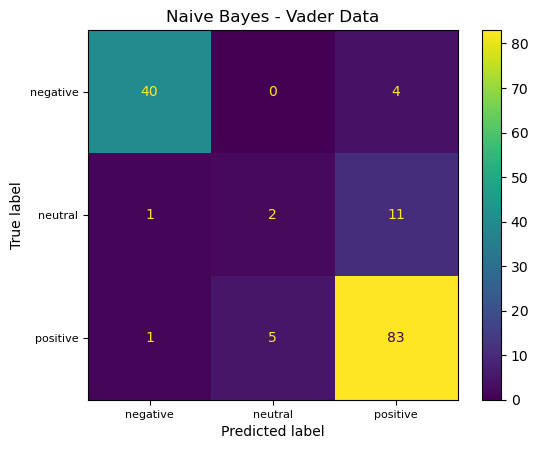

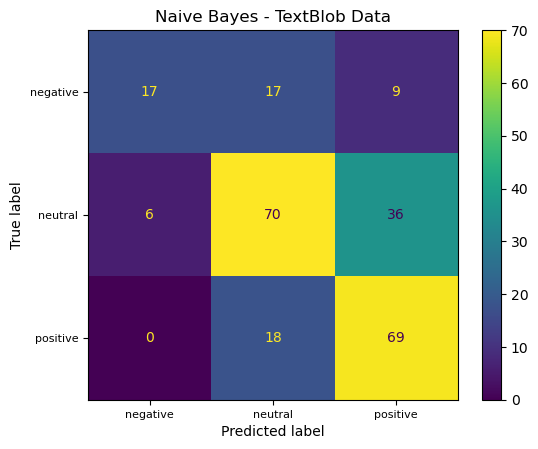

In [25]:
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Parameters to tune for Naive Bayes
parameters_nb = {
    'nb__alpha': [0.01, 0.1, 1]  # Smoothing parameter
}

# Grid search for hyperparameter tuning
grid_search_nb = GridSearchCV(pipeline_nb, parameters_nb, cv=5, scoring='accuracy', verbose=1)

# Fit and evaluate for both Vader and TextBlob data
grid_search_nb.fit(X_trainv['Text_Combined'], y_trainv['Sentiment_VADER'])
best_model_nb_v = grid_search_nb.best_estimator_
print('best params:', best_model_nb_v)
y_pred_nb_v = best_model_nb_v.predict(X_testv['Text_Combined'])
print_evaluation_metrics(y_testv['Sentiment_VADER'], y_pred_nb_v, "Naive Bayes - Vader Data")

grid_search_nb.fit(X_trainb['Text_Combined'], y_trainb['Sentiment_TextBlob'])
best_model_nb_b = grid_search_nb.best_estimator_
print('best params:', best_model_nb_b)
y_pred_nb_b = best_model_nb_b.predict(X_testb['Text_Combined'])
print_evaluation_metrics(y_testb['Sentiment_TextBlob'], y_pred_nb_b, "Naive Bayes - TextBlob Data")

### Extreme Gradient Boosting (XGBoost)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
best params: Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
  

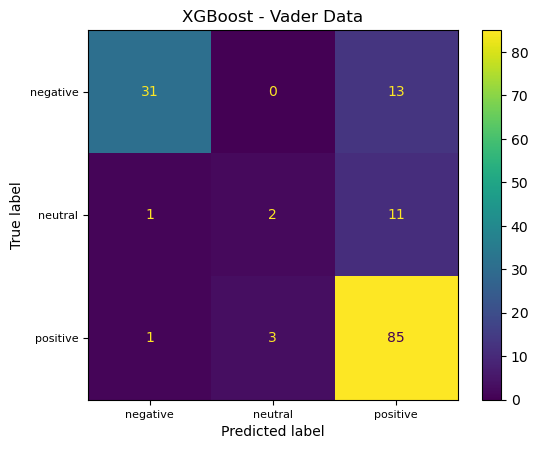

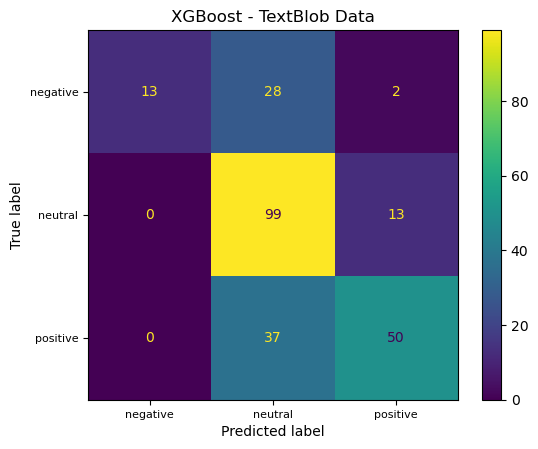

In [26]:
# Create label mapping for xgboost
label_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

# Apply mapping to the Vader labels
y_trainv_l = y_trainv['Sentiment_VADER'].map(label_mapping)
y_testv_l = y_testv['Sentiment_VADER'].map(label_mapping)

# Apply mapping to the TextBlob labels
y_trainb_l = y_trainb['Sentiment_TextBlob'].map(label_mapping)
y_testb_l = y_testb['Sentiment_TextBlob'].map(label_mapping)

# Define the pipeline
pipeline_xgb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Parameters to tune
parameters_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.1, 0.01]
}

# Setup grid search
grid_search_xgb = GridSearchCV(pipeline_xgb, parameters_xgb, cv=5, scoring='accuracy', verbose=1)

# Fit grid search for Vader data
grid_search_xgb.fit(X_trainv['Text_Combined'], y_trainv_l)
best_model_xgb_v = grid_search_xgb.best_estimator_
print('best params:', best_model_xgb_v)

# Predict and evaluate for Vader data
y_pred_xgb_v = best_model_xgb_v.predict(X_testv['Text_Combined'])
print_evaluation_metrics(y_testv_l, y_pred_xgb_v, "XGBoost - Vader Data")

# Fit grid search for TextBlob data
grid_search_xgb.fit(X_trainb['Text_Combined'], y_trainb_l)
best_model_xgb_b = grid_search_xgb.best_estimator_
print('best params:', best_model_xgb_b)

# Predict and evaluate for TextBlob data
y_pred_xgb_b = best_model_xgb_b.predict(X_testb['Text_Combined'])
print_evaluation_metrics(y_testb_l, y_pred_xgb_b, "XGBoost - TextBlob Data")

### Conclusion

Based on the above results, we can see that the VADER sentiment analyzer consistently outperforms the TextBlob sentiment analyzer across all models. 

It should be noted that these results are limited by the performance of the two sentiment analyzers. This analysis could be potentially be improved by incorporporating additional models for the intial classification and by applying manual labels to each post for those that don't have a simple sentiment label of postive, neutral, negative. 

Of the models examined above, Naive Bayes - Vader Data Metrics performed the best overall with Accuracy: 0.8503
and F1 Score: 0.8340. 


